In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,700.0,700.0,,NaN,NaN,NaN,None
1,PRIJEM,VKLAD,900.0,900.0,,NaN,NaN,NaN,None
2,PRIJEM,VKLAD,1000.0,1000.0,,NaN,NaN,NaN,None
3,PRIJEM,VKLAD,600.0,600.0,,NaN,NaN,NaN,None
4,PRIJEM,VKLAD,400.0,400.0,,NaN,NaN,NaN,None


In [3]:
data.shape

(868019, 9)

In [4]:
# Activity 1
#  pd.read_sql_table will accept a table name and will retrieve the whole table. 
#  You can also read a whole table with pd.read_sql. Try it on the table 'district'.












In [5]:
district = pd.read_sql_table('district', engine)
district.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [6]:
district = pd.read_sql('select * from district', engine)
district.head()
# End Activity 1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [7]:
data['status'].value_counts(dropna=False)



NaN    711938
C       72288
A       64599
B        9765
D        9429
Name: status, dtype: int64

In [8]:
data.shape



(868019, 9)

In [9]:
data.dtypes



type          object
operation     object
t_amount     float64
balance      float64
k_symbol      object
l_amount     float64
duration     float64
payments     float64
status        object
dtype: object

In [10]:
data.isna().sum()


type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     711938
duration     711938
payments     711938
status       711938
dtype: int64

In [11]:
data = data[data['duration'].isna() == False]



In [12]:
data.describe()



,t_amount,balance,l_amount,duration,payments
count,156081.000000,156081.000000,156081.000000,156081.000000,156081.000000
mean,7795.357503,45353.630156,146822.230995,35.598209,4189.309205
std,11707.393031,25028.806295,109974.568837,17.189519,2198.565442
min,0.000000,-19310.000000,4980.000000,12.000000,304.000000
25%,144.100000,27291.700000,65184.000000,24.000000,2482.000000
50%,2800.000000,40649.500000,111384.000000,36.000000,3900.000000
75%,9902.000000,59162.000000,203940.000000,48.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,60.000000,9910.000000


In [13]:
data['duration'] = data['duration'].astype('object') # This will be treated as categorical


In [14]:
data['duration'].value_counts()

24.0    34141
12.0    32217
60.0    32042
48.0    29265
36.0    28416
Name: duration, dtype: int64

In [15]:
data.describe()


,t_amount,balance,l_amount,payments
count,156081.000000,156081.000000,156081.000000,156081.000000
mean,7795.357503,45353.630156,146822.230995,4189.309205
std,11707.393031,25028.806295,109974.568837,2198.565442
min,0.000000,-19310.000000,4980.000000,304.000000
25%,144.100000,27291.700000,65184.000000,2482.000000
50%,2800.000000,40649.500000,111384.000000,3900.000000
75%,9902.000000,59162.000000,203940.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,9910.000000


In [16]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [17]:
data['operation'].value_counts()


VYBER             70189
                  31337
PREVOD NA UCET    25796
VKLAD             22633
PREVOD Z UCTU      5336
VYBER KARTOU        790
Name: operation, dtype: int64

In [18]:
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

data['operation'] = list(map(cleanOperation, data['operation']))

In [19]:
data['operation'].value_counts()

vyber      70979
unknown    31337
prevod     31132
vklad      22633
Name: operation, dtype: int64

In [20]:
data['k_symbol'].value_counts()


               73946
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
                5979
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [21]:
data['k_symbol'].value_counts().index


Index(['', 'UROK', 'SLUZBY', 'SIPO', 'UVER', ' ', 'POJISTNE', 'SANKC. UROK'], dtype='object')

In [22]:
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))


In [23]:
data['k_symbol'].value_counts()

unknown        79925
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [24]:
data = data[~data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])] # ~ : NOT

In [25]:
data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])

62        False
63        False
69        False
75        False
96        False
          ...  
867954    False
867981    False
867986    False
867997    False
868011    False
Name: k_symbol, Length: 145336, dtype: bool

In [26]:
# discuss disadvantages and alternatives to dropping rows

In [27]:
data['type'].value_counts()

VYDAJ     80683
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [28]:
# Activity 2:
# Explore values in columns TYPE and OPERATION. 
# How many different loans of each type and operation are there? 
# How many loans for each combination? 
# (You may want to check out pandas.crosstab function.)




In [29]:
data.type.value_counts()


VYDAJ     80683
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

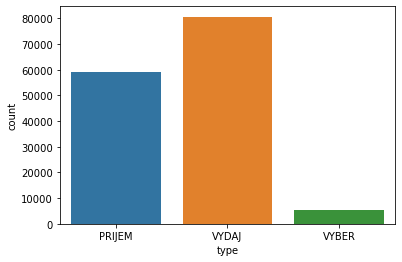

In [30]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=data.type)


In [31]:
data.operation.value_counts()


vyber      70390
unknown    31337
vklad      22633
prevod     20976
Name: operation, dtype: int64

<AxesSubplot:xlabel='operation', ylabel='count'>

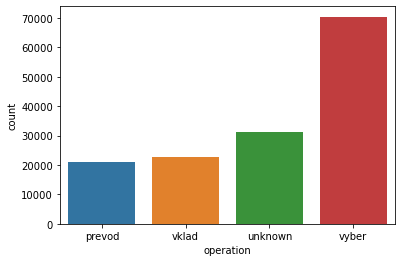

In [32]:
sns.countplot(x=data.operation)



In [33]:
pd.crosstab(data.type, data.operation)

operation,prevod,unknown,vklad,vyber
type,,,,
PRIJEM,5336,31337,22633,0
VYBER,0,0,0,5347
VYDAJ,15640,0,0,65043


In [34]:
#End Activity 2

In [35]:
import matplotlib.pyplot as plt

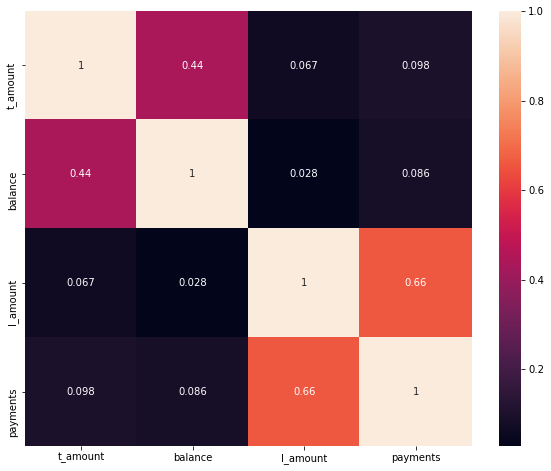

In [36]:
# look for multicolinearity (some columns having almost identical correlation to other variables)
# why can't we look for correlation with our target variable (status)?
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

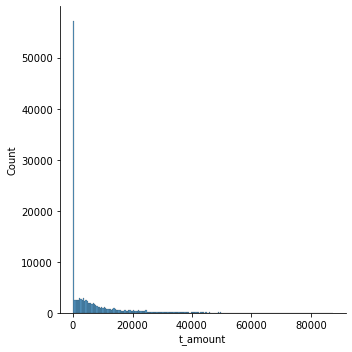

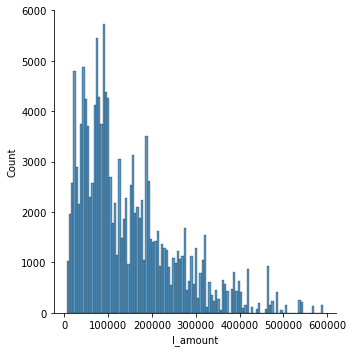

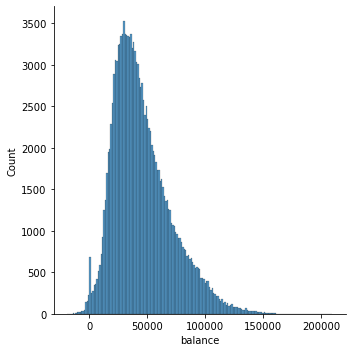

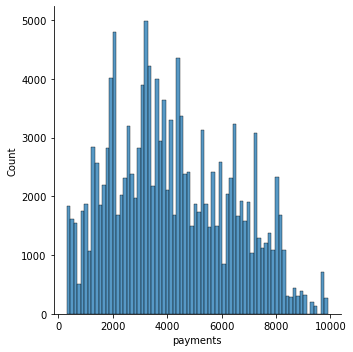

In [37]:
# look at the scale and distribution of values
sns.displot(data['t_amount'])
plt.show()

sns.displot(data['l_amount'])
plt.show()

sns.displot(data['balance'])
plt.show()

sns.displot(data['payments'])
plt.show()

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized)
x_norm.head()

<ipython-input-38-7491b46249f3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = data.select_dtypes(include = np.object)


,0,1,2,3
0,0.512589,0.282709,0.127386,0.313658
1,0.011455,0.087968,0.081606,0.426296
2,0.012600,0.088405,0.028923,0.031751
3,0.008018,0.086657,0.030848,0.168332
4,0.010309,0.087531,0.063027,0.331876


In [39]:
# Whoa, One step back please. What did I do wrong here?

















In [40]:
# Need to train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['status']
X = data.drop('status', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [42]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,t_amount,balance,l_amount,payments
0,0.002688,0.366028,0.138058,0.117323
1,0.002611,0.334904,0.314625,0.296794
2,0.459416,0.411760,0.295002,0.482511
3,0.251718,0.187055,0.470197,0.454924
4,0.000167,0.357972,0.151884,0.131376


In [43]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['type', 'operation', 'k_symbol', 'duration'],
                             drop_first=True)
X_train_cat.head()

<ipython-input-43-9b36f5bfba3e>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,type_VYBER,type_VYDAJ,operation_unknown,operation_vklad,operation_vyber,k_symbol_SLUZBY,k_symbol_UROK,k_symbol_unknown,duration_24.0,duration_36.0,duration_48.0,duration_60.0
723555,0,0,1,0,0,0,1,0,0,0,0,1
698742,0,0,1,0,0,0,1,0,0,0,0,1
662787,0,0,0,1,0,0,0,1,0,1,0,0
670903,1,0,0,0,1,0,0,1,0,0,0,1
311845,0,1,0,0,1,1,0,0,0,0,0,1


In [44]:
# Activity 3
# Explore visually the transformed numerical columns. What do you see?
# Another typical transformation for numerical columns is to take the logarithm. 
# Apply the log transform to columns balance and t_ammount and compare the results with the scaled data.

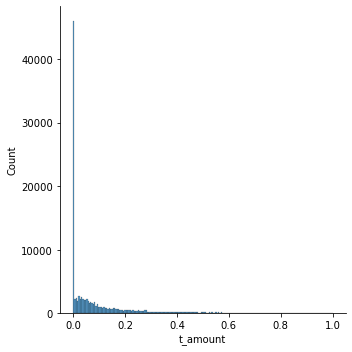

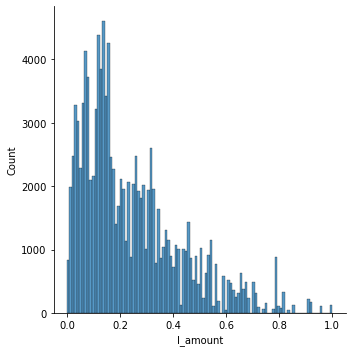

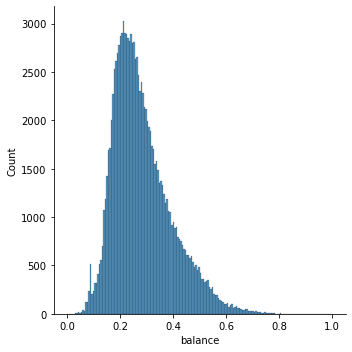

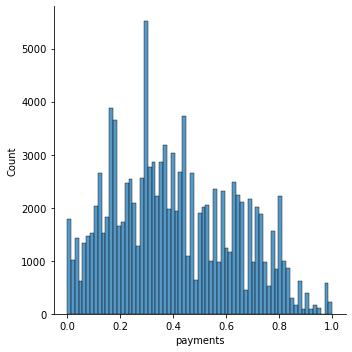

In [45]:
sns.displot(X_train_norm['t_amount'])
plt.show()

sns.displot(X_train_norm['l_amount'])
plt.show()

sns.displot(X_train_norm['balance'])
plt.show()

sns.displot(X_train_norm['payments'])
plt.show()

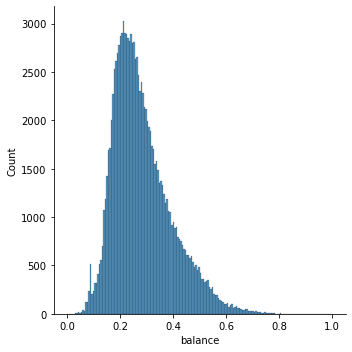

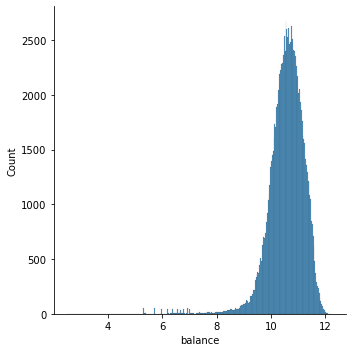

In [46]:
sns.displot(X_train_norm['balance']) # normalized
sns.displot(X_train_num['balance'].apply(lambda x:np.log(x))) # divide by twelve to get a 0-1 scale
plt.show()


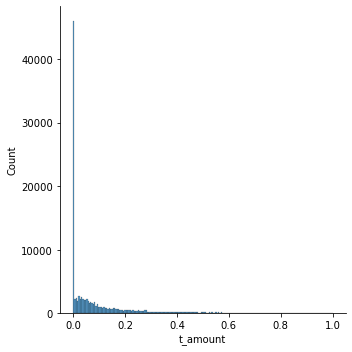

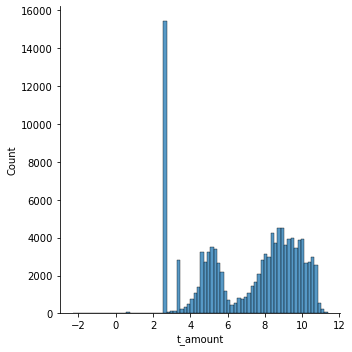

In [47]:
sns.displot(X_train_norm['t_amount']) # normalized
sns.displot(X_train_num['t_amount'].apply(lambda x:np.log(x) if x>0 else x)) # /12? (log transformed)
plt.show()

In [48]:
# End Activity 3

In [73]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [74]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [76]:
# Can we now make predictions on the X_test?
# predictions = classification.predict(X_test)
# classification.score(X_test, y_test)


# NO - need to perform transformations on the X_test as well

In [77]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [78]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['type', 'operation', 'k_symbol', 'duration'],
                            drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each original column seperately with one_hot_encoder

X_test_cat.head()

<ipython-input-78-f065273643eb>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


[('type_VYBER', 'type_VYBER'),
 ('type_VYDAJ', 'type_VYDAJ'),
 ('operation_unknown', 'operation_unknown'),
 ('operation_vklad', 'operation_vklad'),
 ('operation_vyber', 'operation_vyber'),
 ('k_symbol_SLUZBY', 'k_symbol_SLUZBY'),
 ('k_symbol_UROK', 'k_symbol_UROK'),
 ('k_symbol_unknown', 'k_symbol_unknown'),
 ('duration_24.0', 'duration_24.0'),
 ('duration_36.0', 'duration_36.0'),
 ('duration_48.0', 'duration_48.0'),
 ('duration_60.0', 'duration_60.0')]

,type_VYBER,type_VYDAJ,operation_unknown,operation_vklad,operation_vyber,k_symbol_SLUZBY,k_symbol_UROK,k_symbol_unknown,duration_24.0,duration_36.0,duration_48.0,duration_60.0
478908,0,0,0,1,0,0,0,1,0,0,1,0
311954,0,1,0,0,1,0,0,1,0,0,1,0
556575,0,0,1,0,0,0,1,0,0,0,0,0
609597,0,1,0,0,1,0,0,1,1,0,0,0
398816,0,0,1,0,0,0,1,0,0,0,0,1


In [79]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [80]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.7034883720930233

In [81]:
print(y_test.value_counts())
# As you would notice here, there is a huge imbalance in the data among the different classes. 
# We will talk more about imbalance and how to resolve it later


C    13254
A    12245
B     1804
D     1765
Name: status, dtype: int64


In [82]:
pd.Series(predictions).value_counts()
# This shows that the disparity in the numbers are amplified by the model

C    16111
A    12653
B      257
D       47
dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 9184,    50,  3011,     0],
       [ 1056,   160,   588,     0],
       [ 2162,     8, 11071,    13],
       [  251,    39,  1441,    34]], dtype=int64)

In [60]:
# predicted | A | B | C | D |
# --------------------------
# actual  A | + |  |   |   |
# --------------------------
#         B |   | + |   |   |
# --------------------------
#         C |   |   | + |   |
# --------------------------
#         D |   |   |   | + |

In [61]:
# bonus: KNN classifier: look at nearest neighbours and use the majority to determine class
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.8230356405669464

In [62]:
confusion_matrix(y_test, predictions_clf)

array([[10952,   221,   998,    74],
       [  449,  1130,   188,    37],
       [ 1787,   241, 11006,   220],
       [  218,    94,   617,   836]], dtype=int64)

In [63]:
pd.Series(y_test).value_counts()

C    13254
A    12245
B     1804
D     1765
Name: status, dtype: int64

In [64]:
pd.Series(predictions_clf).value_counts()

A    13406
C    12809
B     1686
D     1167
dtype: int64